# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# To ignore warnings

import warnings
warnings.filterwarnings('ignore')

# Data Collection and Analysis

In [3]:
# Loading data from CSV file to Pandas Dataframe 

df = pd.read_csv('Mall_Customers.csv')

In [4]:
# First 5 rows of the Dataframe

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Number of rows and columns

df.shape

(200, 5)

In [6]:
# Getting Information about Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Statical Information of dataset

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# checking for Missing values

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

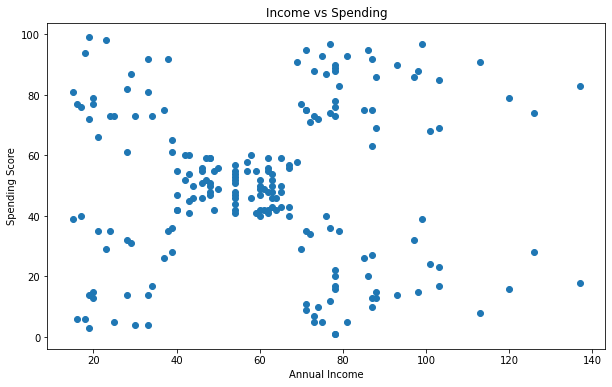

In [9]:
# Checking for data distribution

plt.figure(figsize=(10,6))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Income vs Spending')
plt.show()

In [10]:
# Choosing the Annual Income Column & Spending Score column

X = df.iloc[:,[3,4]].values

In [11]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [12]:
# Choosing the number of clusters

# WCSS -> Within Clusters Sum of Squares

In [13]:
# Elbow Method

clustering_score = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='random', random_state=42)
    kmeans.fit(X)
    
    clustering_score.append(kmeans.inertia_)

In [14]:
clustering_score

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30273.394312070042,
 25095.703209997548,
 23287.318947718948,
 19710.0302716608]

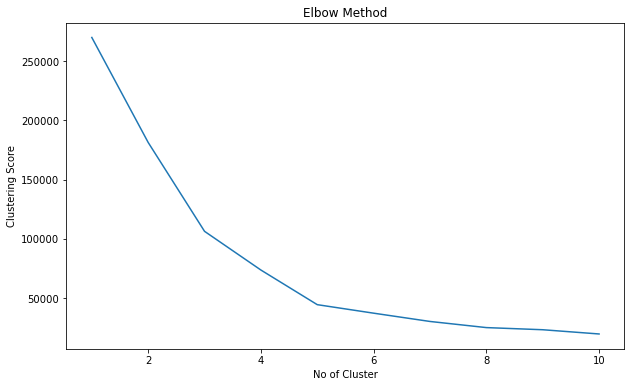

In [15]:
# Plotting elbow graph

plt.figure(figsize=(10,6))
plt.plot(range(1,11),clustering_score)
plt.xlabel('No of Cluster')
plt.ylabel('Clustering Score')
plt.title('Elbow Method')
plt.show()

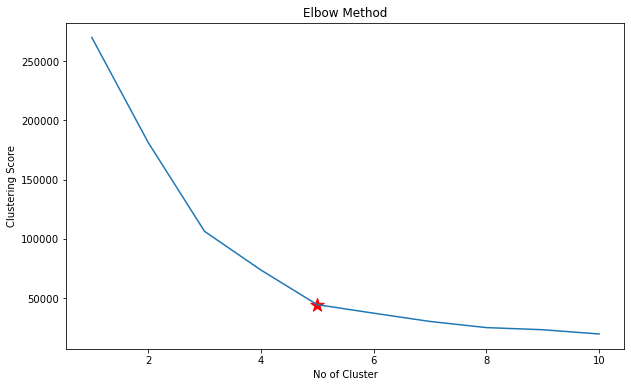

In [16]:
# Optimum Number of Clusters = 5

plt.figure(figsize=(10,6))
plt.plot(range(1,11),clustering_score)
plt.scatter(5,clustering_score[4], s=200, c='red', marker='*')
plt.xlabel('No of Cluster')
plt.ylabel('Clustering Score')
plt.title('Elbow Method')
plt.show()

In [17]:
# Training the k-Means Clustering Model

# Selecting number of cluster = 5

In [18]:
# Set up a model
km = KMeans(n_clusters=5, random_state=42)

# Fit Model
km.fit(X)

# Predict 
pred = km.predict(X)
print(pred)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [19]:
df['cluster'] = pd.DataFrame(pred,columns = ['clusters'])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


In [20]:
df['cluster'].value_counts()

0    81
4    39
1    35
2    23
3    22
Name: cluster, dtype: int64

In [21]:
# Centroid of each cluster 

km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

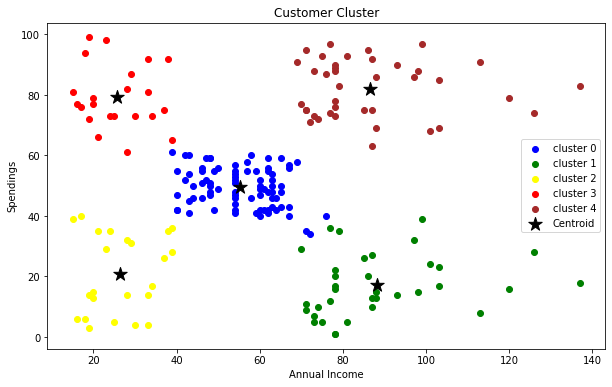

In [22]:
# plotting all the clusters and their Centroids


plt.figure(figsize = (10,6))
plt.scatter(X[pred == 0,0], X[pred == 0,1], c='blue', label='cluster 0')
plt.scatter(X[pred == 1,0], X[pred == 1,1], c='green', label='cluster 1')
plt.scatter(X[pred == 2,0], X[pred == 2,1], c='yellow', label='cluster 2')
plt.scatter(X[pred == 3,0], X[pred == 3,1], c='red', label='cluster 3')
plt.scatter(X[pred == 4,0], X[pred == 4,1], c='brown', label='cluster 4')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=200, c='black', label='Centroid', marker='*')
plt.title('Customer Cluster')
plt.xlabel('Annual Income')
plt.ylabel('Spendings')
plt.legend()
plt.show()